In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from data_utils import generate_ground_truth_matrix, ground_truth_matrix_to_dataset, to_dataframe, generate_test_dataframe
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise import accuracy

In [2]:
# Plot P against R (flattened)

def P_R_train(beta):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-dynamic-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta)
    return P, R

beta = np.linspace(0.01, 3, 6)
results = [P_R_train(i) for i in beta]     

/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_10308/3830447178.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


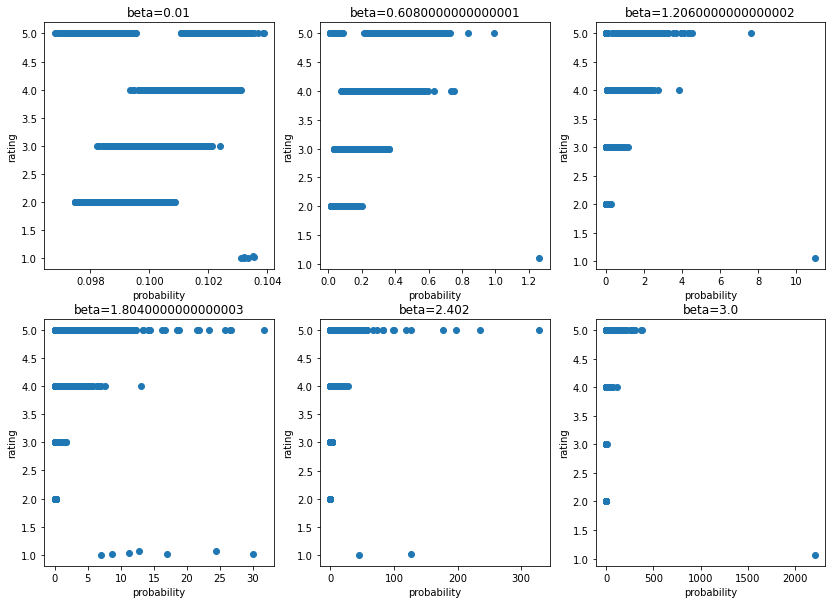

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
for i in range(6):
    axs[i // 3, i % 3].scatter(results[i][0].flatten(), results[i][1].flatten(), linestyle='None')
    axs[i // 3, i % 3].set(xlabel='probability',
                           ylabel='rating', title=f'beta={beta[i]}')
fig.show()

In [4]:
truth = generate_ground_truth_matrix(
    (1000, 1000), environment='latent-static-v1')
users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
    truth, quantization='binary', bias='full underlying')
train_df = to_dataframe(ratings)

In [5]:
reader = Reader(rating_scale=(1, 2))
data = Dataset.load_from_df(train_df[['userID', 'itemID', 'rating']], reader)
trainset = data.build_full_trainset()

knn = KNNBasic()
svd = SVD()

knn.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [6]:
test_df = generate_test_dataframe(R)
testset = Dataset.load_from_df(test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
predictions = knn.test(testset)
accuracy.rmse(predictions)

RMSE: 0.7026


0.702618978109243

In [15]:
beta = np.linspace(0.1, 5, 30)
result = []

for i in range(len(beta)):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-static-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta[i])
    train_df = to_dataframe(ratings)

    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(train_df[['userID', 'itemID', 'rating']], reader)
    trainset = data.build_full_trainset()

    knn = SVD()
    knn.fit(trainset)

    test_df = generate_test_dataframe(R_no_noise)
    testset = Dataset.load_from_df(test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
    predictions = knn.test(testset)
    result.append(accuracy.rmse(predictions) / R_no_noise.mean())

result_5 = result

result = []

for i in range(len(beta)):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-static-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='onetothree', bias='full underlying', beta=beta[i])
    train_df = to_dataframe(ratings)

    reader = Reader(rating_scale=(1, 3))
    data = Dataset.load_from_df(
        train_df[['userID', 'itemID', 'rating']], reader)
    trainset = data.build_full_trainset()

    knn = SVD()
    knn.fit(trainset)

    test_df = generate_test_dataframe(R_no_noise)
    testset = Dataset.load_from_df(
        test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
    predictions = knn.test(testset)
    result.append(accuracy.rmse(predictions) / R_no_noise.mean())

result_3 = result

result = []

for i in range(len(beta)):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-static-v1')
    users, items, ratings, P, R, R_no_noise = ground_truth_matrix_to_dataset(
        truth, quantization='onetoten', bias='full underlying', beta=beta[i])
    train_df = to_dataframe(ratings)

    reader = Reader(rating_scale=(1, 10))
    data = Dataset.load_from_df(
        train_df[['userID', 'itemID', 'rating']], reader)
    trainset = data.build_full_trainset()

    knn = SVD()
    knn.fit(trainset)

    test_df = generate_test_dataframe(R_no_noise)
    testset = Dataset.load_from_df(
        test_df[['userID', 'itemID', 'rating']], reader).build_full_trainset().build_testset()
    predictions = knn.test(testset)
    result.append(accuracy.rmse(predictions) / R_no_noise.mean())

result_10 = result


RMSE: 0.4960
RMSE: 0.4816
RMSE: 0.5048
RMSE: 0.5075
RMSE: 0.5380
RMSE: 0.5767
RMSE: 0.5450
RMSE: 0.6071
RMSE: 0.6083
RMSE: 0.6880
RMSE: 0.7173
RMSE: 0.7718
RMSE: 0.7655
RMSE: 0.8542
RMSE: 0.8532
RMSE: 0.9436
RMSE: 0.9659
RMSE: 1.0567
RMSE: 1.1114
RMSE: 1.1303
RMSE: 1.1711
RMSE: 1.1070
RMSE: 1.2466
RMSE: 1.2699
RMSE: 1.3302
RMSE: 1.3289
RMSE: 1.3866
RMSE: 1.4659
RMSE: 1.4630
RMSE: 1.5442
RMSE: 0.2990
RMSE: 0.3233
RMSE: 0.3131
RMSE: 0.3104
RMSE: 0.3142
RMSE: 0.3605
RMSE: 0.3240
RMSE: 0.3779
RMSE: 0.3746
RMSE: 0.4123
RMSE: 0.4204
RMSE: 0.4162
RMSE: 0.3964
RMSE: 0.4390
RMSE: 0.4738
RMSE: 0.5206
RMSE: 0.4733
RMSE: 0.5637
RMSE: 0.6488
RMSE: 0.6860
RMSE: 0.7009
RMSE: 0.6361
RMSE: 0.7876
RMSE: 0.7950
RMSE: 0.8204
RMSE: 0.8427
RMSE: 0.8733
RMSE: 0.8960
RMSE: 0.8714
RMSE: 0.8701
RMSE: 0.7890
RMSE: 0.8370
RMSE: 0.8210
RMSE: 0.8422
RMSE: 0.9026
RMSE: 0.9826
RMSE: 1.0380
RMSE: 1.0548
RMSE: 1.2455
RMSE: 1.2502
RMSE: 1.3832
RMSE: 1.3227
RMSE: 1.3921
RMSE: 1.5353
RMSE: 1.6705
RMSE: 1.8367
RMSE: 1.9018

/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_10308/1824483248.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


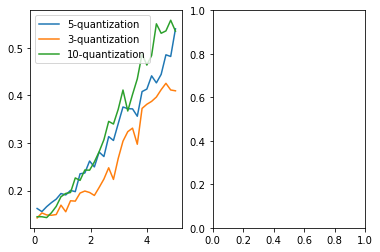

In [16]:
fig, axs = plt.subplots(1, 2)
axs[0].plot(beta, result_5, label='5-quantization')
axs[0].plot(beta, result_3, label='3-quantization')
axs[0].plot(beta, result_10, label='10-quantization')
axs[0].legend()
fig.show()